# Bilibili 电商平台数据分析


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os


In [2]:
# 拼接所有数据
data = pd.read_excel("bilibili_02_10.xlsx",None)
keys = list(data.keys())
data_result = pd.DataFrame()
for i in keys:
    data1 = data[i]
    data_result = pd.concat([data_result,data1])
data_result.head()

,订单号,商品编号,商品名称,商品价格,票号,座位,联系地址,渠道,外渠道,下单时间,支付时间,支付单号,店铺名称,店铺id,订单状态,售后状态,是否海外购,税费
0,'100000057137818,10008058,[追加限量]BANPRESTO（眼镜厂）精灵宝可梦 日月 皮卡丘&卡比兽 景品手办,13.20,--,--,--,search,bilibiliapp,2019-02-10 11:59:56,2019-02-10 12:00:09,'3083592851637686272,会员购,2233,待支付,--,否,0
1,'100000057116937,10005096,[追加限量]GSC DARLING in the FRANXX 莓 手办,100.05,--,--,--,search,bilibiliapp,2019-02-10 11:59:45,2019-02-10 11:59:54,'4083592793121865728,会员购,2233,待支付,--,否,0
2,'100000057119846,10008385,AForce 我的英雄学院 舞台剧系列 盒蛋 第二弹(1盒5个+特典),56.25,--,--,--,search,bilibiliapp,2019-02-10 11:59:45,0002-11-30 00:00:00,'--,会员购,2233,已取消,--,否,0
3,'100000057115828,10000170,万代 HG 巴巴托斯高达天狼座 巴巴托斯高达&库坦三型长距离输送推进器 拼装模型 【机动战士...,55.00,--,--,四川省 攀枝花市 西区 建兴路22号19栋2单元11号,card_dm,bilibiliapp,2019-02-10 11:59:39,0002-11-30 00:00:00,'--,会员购,2233,已取消,--,否,0
4,'100000057142686,10008296,Max Factory Fate/Grand Order Master/主人公 女 figma,57.75,--,--,--,category_sb,bilibiliapp,2019-02-10 11:59:36,2019-02-10 11:59:49,'4083592767356256256,会员购,2233,待支付,--,否,0


In [3]:
# 判断是否拼接成功
data_result.shape

(29811, 18)

In [4]:
data_result.describe()

,商品编号,商品价格,店铺id,税费
count,2.981100e+04,29811.000000,29811.000000,29811.0
mean,1.000563e+07,170.994262,2233.694006,0.0
std,2.452769e+03,290.782607,7.707911,0.0
min,1.000001e+07,1.000000,2233.000000,0.0
25%,1.000396e+07,16.350000,2233.000000,0.0
50%,1.000641e+07,99.000000,2233.000000,0.0
75%,1.000795e+07,197.475000,2233.000000,0.0
max,1.000841e+07,17805.150000,2408.000000,0.0


In [5]:
data_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29811 entries, 0 to 4926
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   订单号     29811 non-null  object        
 1   商品编号    29811 non-null  int64         
 2   商品名称    29811 non-null  object        
 3   商品价格    29811 non-null  float64       
 4   票号      29811 non-null  object        
 5   座位      29811 non-null  object        
 6   联系地址    29811 non-null  object        
 7   渠道      29811 non-null  object        
 8   外渠道     29811 non-null  object        
 9   下单时间    29811 non-null  datetime64[ns]
 10  支付时间    29811 non-null  object        
 11  支付单号    29811 non-null  object        
 12  店铺名称    29811 non-null  object        
 13  店铺id    29811 non-null  int64         
 14  订单状态    29811 non-null  object        
 15  售后状态    29811 non-null  object        
 16  是否海外购   29811 non-null  object        
 17  税费      29811 non-null  int64         
dtypes: date

In [6]:
# 判断票号信息是否有用
data_result[data_result['票号'] != "--"]

,订单号,商品编号,商品名称,商品价格,票号,座位,联系地址,渠道,外渠道,下单时间,支付时间,支付单号,店铺名称,店铺id,订单状态,售后状态,是否海外购,税费


In [7]:
# 判断座位信息是否有用
data_result[data_result['座位'] != "--"]

,订单号,商品编号,商品名称,商品价格,票号,座位,联系地址,渠道,外渠道,下单时间,支付时间,支付单号,店铺名称,店铺id,订单状态,售后状态,是否海外购,税费


In [8]:
# 判断售后状态是否有用
data_result[data_result['售后状态'] != "--"]

,订单号,商品编号,商品名称,商品价格,票号,座位,联系地址,渠道,外渠道,下单时间,支付时间,支付单号,店铺名称,店铺id,订单状态,售后状态,是否海外购,税费


In [9]:
# 判断是否海外购的信息
data_result.groupby('是否海外购').count()

,订单号,商品编号,商品名称,商品价格,票号,座位,联系地址,渠道,外渠道,下单时间,支付时间,支付单号,店铺名称,店铺id,订单状态,售后状态,税费
是否海外购,,,,,,,,,,,,,,,,,
否,29701,29701,29701,29701,29701,29701,29701,29701,29701,29701,29701,29701,29701,29701,29701,29701,29701
是,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110


In [10]:
# 判断税费是否存在不等于0情况
data_result[data_result['税费'] != 0]

,订单号,商品编号,商品名称,商品价格,票号,座位,联系地址,渠道,外渠道,下单时间,支付时间,支付单号,店铺名称,店铺id,订单状态,售后状态,是否海外购,税费


In [11]:
# 判断店铺名称
data_result.groupby('店铺名称').count()

,订单号,商品编号,商品名称,商品价格,票号,座位,联系地址,渠道,外渠道,下单时间,支付时间,支付单号,店铺id,订单状态,售后状态,是否海外购,税费
店铺名称,,,,,,,,,,,,,,,,,
AFU阿芙精油,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
AKOKO官方旗舰店,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
MissCandy健康甲油官方旗舰店,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Van强的摔跤更衣室,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
holdlive旗舰店,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
一夜北风吹,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
七创社官方旗舰店,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49
不搞博士搞沙雕,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
会员购,29517,29517,29517,29517,29517,29517,29517,29517,29517,29517,29517,29517,29517,29517,29517,29517,29517


In [12]:
# 判断店铺名称
data_result.groupby('店铺id').count()

,订单号,商品编号,商品名称,商品价格,票号,座位,联系地址,渠道,外渠道,下单时间,支付时间,支付单号,店铺名称,订单状态,售后状态,是否海外购,税费
店铺id,,,,,,,,,,,,,,,,,
2233,29517,29517,29517,29517,29517,29517,29517,29517,29517,29517,29517,29517,29517,29517,29517,29517,29517
2235,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
2239,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2247,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2259,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
2266,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2276,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2279,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2291,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30


In [13]:
data_result.drop(['票号','座位','售后状态','税费'], axis = 1, inplace=True)

In [14]:
data_result

,订单号,商品编号,商品名称,商品价格,联系地址,渠道,外渠道,下单时间,支付时间,支付单号,店铺名称,店铺id,订单状态,是否海外购
0,'100000057137818,10008058,[追加限量]BANPRESTO（眼镜厂）精灵宝可梦 日月 皮卡丘&卡比兽 景品手办,13.20,--,search,bilibiliapp,2019-02-10 11:59:56,2019-02-10 12:00:09,'3083592851637686272,会员购,2233,待支付,否
1,'100000057116937,10005096,[追加限量]GSC DARLING in the FRANXX 莓 手办,100.05,--,search,bilibiliapp,2019-02-10 11:59:45,2019-02-10 11:59:54,'4083592793121865728,会员购,2233,待支付,否
2,'100000057119846,10008385,AForce 我的英雄学院 舞台剧系列 盒蛋 第二弹(1盒5个+特典),56.25,--,search,bilibiliapp,2019-02-10 11:59:45,0002-11-30 00:00:00,'--,会员购,2233,已取消,否
3,'100000057115828,10000170,万代 HG 巴巴托斯高达天狼座 巴巴托斯高达&库坦三型长距离输送推进器 拼装模型 【机动战士...,55.00,四川省 攀枝花市 西区 建兴路22号19栋2单元11号,card_dm,bilibiliapp,2019-02-10 11:59:39,0002-11-30 00:00:00,'--,会员购,2233,已取消,否
4,'100000057142686,10008296,Max Factory Fate/Grand Order Master/主人公 女 figma,57.75,--,category_sb,bilibiliapp,2019-02-10 11:59:36,2019-02-10 11:59:49,'4083592767356256256,会员购,2233,待支付,否
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4922,'100000057198899,10000314,GSC 宝石之国 磷叶石 手办,479.00,广东省 深圳市 盐田区 沙头角碧海蓝天明苑碧海阁29B,zhc_sbhc2,mallbanner,2019-02-10 22:00:01,0002-11-30 00:00:00,'--,会员购,2233,已取消,否
4923,'100000057199320,10000314,GSC 宝石之国 磷叶石 手办,479.00,江苏省 南京市 玄武区 新街口街道沙塘园五號安全小區派件務必聯繫,banner,mallbanner,2019-02-10 22:00:01,2019-02-10 22:01:24,'4083744163225931776,会员购,2233,待发货,否
4924,'100000057205071,10000314,GSC 宝石之国 磷叶石 手办,479.00,广东省 广州市 天河区 天源路808号12栋603,banner,mallbanner,2019-02-10 22:00:01,2019-02-10 22:01:53,'3083744289074126848,会员购,2233,待发货,否
4925,'100000057191618,10000314,GSC 宝石之国 磷叶石 手办,479.00,江苏省 苏州市 吴中区 长蠡新村8栋,search,--,2019-02-10 22:00:01,2019-02-10 22:03:15,'4083744641284313088,会员购,2233,待发货,否


In [15]:
## 去除预订单，所有没有地址的都不算进去
df = data_result[data_result['联系地址']!="--"]
df

,订单号,商品编号,商品名称,商品价格,联系地址,渠道,外渠道,下单时间,支付时间,支付单号,店铺名称,店铺id,订单状态,是否海外购
3,'100000057115828,10000170,万代 HG 巴巴托斯高达天狼座 巴巴托斯高达&库坦三型长距离输送推进器 拼装模型 【机动战士...,55.0,四川省 攀枝花市 西区 建兴路22号19栋2单元11号,card_dm,bilibiliapp,2019-02-10 11:59:39,0002-11-30 00:00:00,'--,会员购,2233,已取消,否
7,'100000057117185,10004152,万代 RG 沙扎比 拼装模型 【机动战士高达 逆袭的夏亚】,503.0,天津市 天津市 南开区 迎水道华苑十华里13-1-1401,homepage,homepage,2019-02-10 11:59:30,2019-02-10 11:59:51,'3083592758545108992,会员购,2233,待发货,否
8,'100000057117185,10005326,万代 MG 机动战士高达SEED 圣盾高达 拼装模型,503.0,天津市 天津市 南开区 迎水道华苑十华里13-1-1401,homepage,homepage,2019-02-10 11:59:30,2019-02-10 11:59:51,'3083592758545108992,会员购,2233,待发货,否
9,'100000057117185,10003983,田宫 (74040)笔刀替换刀片(25枚) 模型制作工具,503.0,天津市 天津市 南开区 迎水道华苑十华里13-1-1401,homepage,homepage,2019-02-10 11:59:30,2019-02-10 11:59:51,'3083592758545108992,会员购,2233,待发货,否
13,'100000057123611,10003100,寿屋 命运石之门0 牧濑红莉栖-Antinomic Dual- 手办,649.0,山东省 潍坊市 坊子区 凤凰街道葛家小区16号楼5单元102,shoppingcart,bilibiliapp,2019-02-10 11:59:21,2019-02-10 12:02:36,'4083593463329161216,会员购,2233,待发货,否
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4922,'100000057198899,10000314,GSC 宝石之国 磷叶石 手办,479.0,广东省 深圳市 盐田区 沙头角碧海蓝天明苑碧海阁29B,zhc_sbhc2,mallbanner,2019-02-10 22:00:01,0002-11-30 00:00:00,'--,会员购,2233,已取消,否
4923,'100000057199320,10000314,GSC 宝石之国 磷叶石 手办,479.0,江苏省 南京市 玄武区 新街口街道沙塘园五號安全小區派件務必聯繫,banner,mallbanner,2019-02-10 22:00:01,2019-02-10 22:01:24,'4083744163225931776,会员购,2233,待发货,否
4924,'100000057205071,10000314,GSC 宝石之国 磷叶石 手办,479.0,广东省 广州市 天河区 天源路808号12栋603,banner,mallbanner,2019-02-10 22:00:01,2019-02-10 22:01:53,'3083744289074126848,会员购,2233,待发货,否
4925,'100000057191618,10000314,GSC 宝石之国 磷叶石 手办,479.0,江苏省 苏州市 吴中区 长蠡新村8栋,search,--,2019-02-10 22:00:01,2019-02-10 22:03:15,'4083744641284313088,会员购,2233,待发货,否


In [16]:
## 查看订单状态为已取消的订单，是否有恶意订单占货
df2 = df[df['订单状态'] == "已取消"].sort_values(by="商品价格",ascending=False)
df2.to_excel("cancel.xlsx")

In [17]:
df2.shape

(2927, 14)

In [18]:
## 删除订单状态为已取消的订单
df_final = df[df['订单状态'] != "已取消"]
df_final.to_excel("cleaned_data.xlsx")

In [19]:
df_final['下单时间'] = pd.to_datetime(df_final['下单时间'],format="%Y/%m/%d %H:%M:%S")

# i = pd.date_range('2019-02-10', periods=12, freq='H')
# _final['下单时间'] = pd.to_datetime(df_final['下单时间'],format="%Y/%m/%d %H:%M:%S")

# i = df_final['下单时间'] 
# i.resample('H').sum()


# i = pd.date_range('2019-02-10', periods=12, freq='H')
# _final['下单时间'] = pd.to_datetime(df_final['下单时间'],format="%Y/%m/%d %H:%M:%S")

# i = df_final['下单时间'] 
# i.resample('H').sum()
df['下单时间（时）'] = df['下单时间'].dt.strftime('%H')
df_new = df.groupby('下单时间（时）').count()
df_new

/Users/haoyuexu/opt/anaconda3/envs/py_env/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,订单号,商品编号,商品名称,商品价格,联系地址,渠道,外渠道,下单时间,支付时间,支付单号,店铺名称,店铺id,订单状态,是否海外购
下单时间（时）,,,,,,,,,,,,,,
00,458,458,458,458,458,458,458,458,458,458,458,458,458,458
01,288,288,288,288,288,288,288,288,288,288,288,288,288,288
02,207,207,207,207,207,207,207,207,207,207,207,207,207,207
03,105,105,105,105,105,105,105,105,105,105,105,105,105,105
04,70,70,70,70,70,70,70,70,70,70,70,70,70,70
05,41,41,41,41,41,41,41,41,41,41,41,41,41,41
06,56,56,56,56,56,56,56,56,56,56,56,56,56,56
07,87,87,87,87,87,87,87,87,87,87,87,87,87,87
08,151,151,151,151,151,151,151,151,151,151,151,151,151,151


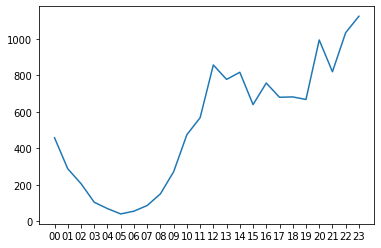

In [20]:
plt.plot(df_new.index,df_new[['订单号']])
plt.show()

